<a href="https://colab.research.google.com/github/yeekha89/Assignment-Submmissions/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

In [10]:
#load data
file = "https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt"
df = pd.read_table(file, header=0, delim_whitespace=True)
df.head()

/tmp/ipython-input-2924841429.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_table(file, header=0, delim_whitespace=True)


,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [11]:
#independent variables and dependent variables
features = df[['AGE', 'BMI', 'BP']]
label = df[['Y']]

In [13]:
#split data into training and testing data
X_train, X_test, y_train, y_test = model_selection.train_test_split(features, label, test_size=0.2, random_state=42)

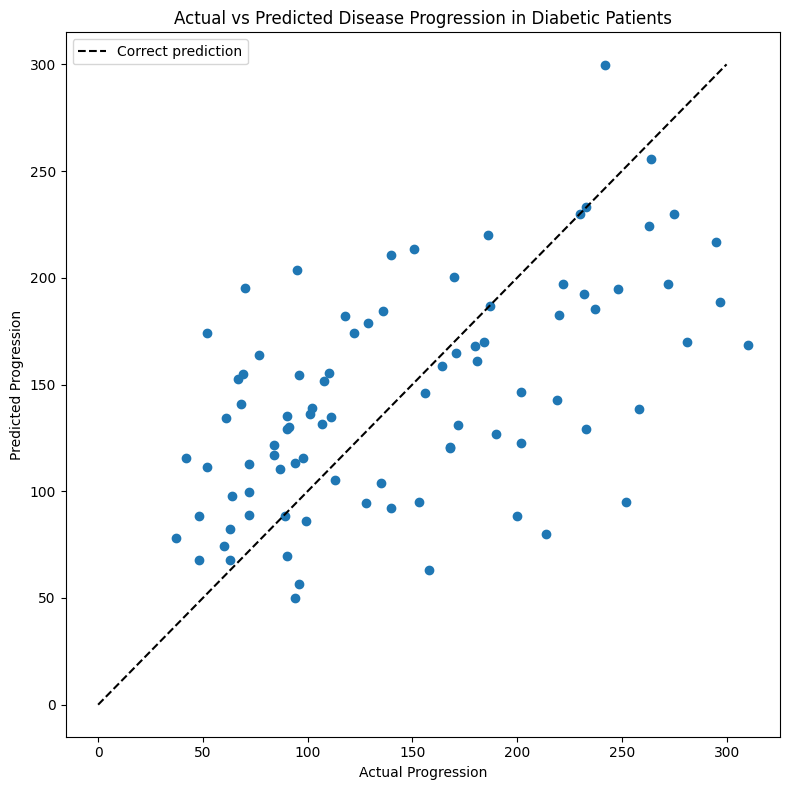

In [23]:
#initialize, fit, test and test model
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

#visualize model
plt.figure(figsize=(8, 8))
plt.scatter(y_test, pred)
plt.plot([0, 300], [0, 300], '--k', label="Correct prediction")
plt.xlabel('Actual Progression')
plt.ylabel('Predicted Progression')
plt.title("Actual vs Predicted Disease Progression in Diabetic Patients")
plt.axis('tight')
plt.legend()
plt.tight_layout()

In [25]:
#evaluate model
print('mean squared: ', mean_squared_error(y_test, pred))
print('r squared: ', r2_score(y_test, pred))

mean squared:  3756.8366496443828
r squared:  0.2909156196410876


In [32]:
#use model for one patient age 30, bmi of 25.9, and avg bp of 99
#use model for another patient age 49, bmi of 22.6, and bp of 116
patient = pd.DataFrame([[30, 25.9, 99],[49, 22.6, 116]], columns = ["AGE", "BMI", "BP"])

disease_prediction = lr.predict(patient)
print(disease_prediction)

[[149.92192123]
 [145.77649221]]
